# Hello Image Classification

A very basic introduction to OpenVINO that shows how to perform inference with an image classification model.

Used a pre-trained [MobileNetV3 model](https://docs.openvinotoolkit.org/latest/omz_models_model_mobilenet_v3_small_1_0_224_tf.html) from the [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/). See the [TensorFlow to OpenVINO](101-tensorflow-to-openvino) 

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.inference_engine import IECore

## Load the Model

In [2]:
ie = IECore()
net = ie.read_network(
    model="model/v3-small_224_1.0_float.xml", weights="model/v3-small_224_1.0_float.bin"
)
exec_net = ie.load_network(network=net, device_name="CPU")

input_key = next(iter(exec_net.input_info))
output_key = next(iter(exec_net.outputs.keys()))

## Load an Image

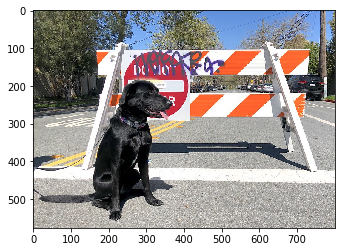

In [3]:
# The MobileNet network expects images in RGB format
image = cv2.cvtColor(cv2.imread(filename="data/coco.jpg"), code=cv2.COLOR_BGR2RGB)

# resize to MobileNet image shape
input_image = cv2.resize(src=image, dsize=(224, 224))

# reshape to network input shape
input_image = np.expand_dims(input_image.transpose(2, 0, 1), 0)
plt.imshow(image);

## Do Inference

In [4]:
result = exec_net.infer(inputs={input_key: input_image})[output_key]
result_index = np.argmax(result)

In [5]:
# Convert the inference result to a class name.
imagenet_classes = open("utils/imagenet_2012.txt").read().splitlines()

# The model description states that for this model, class 0 is background,
# so we add background at the beginning of imagenet_classes
imagenet_classes = ['background'] + imagenet_classes

imagenet_classes[result_index]

'n02099267 flat-coated retriever'